 # Gaussian Mixture Models: practical example

The aim of this project is to cluster the participants by using the `Gaussian Mixture Models algorithm`.

We utilized a preexisting dataset provided by Konaszewski et al. (Konaszewski K, Niesiobędzka M, Surzykiewicz J. Resilience and mental health among juveniles: role of strategies for coping with stress. Health Qual Life Outcomes. 2021 Feb 18;19(1):58) https://doi.org/10.3886/E120001V1. They investigate the direct and indirect role of resilience in shaping the mental health of juveniles. The dataset includes `resilience`, `well-being` and 14 `coping strategies`.

In [12]:
# Importing the libraries  
import numpy as np 
import pandas as pd  
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.mixture import GaussianMixture

In [6]:
df, meta=pyreadstat.read_sav('konzas2.sav')

In [7]:
df.head(3)

,wb1,wb2,wb3,wb4,wb5,wb6,wb7,wb8,wb9,wb10,...,Behavioral_disengagement,Venting,Positive_reframing,Planning,Humor,Acceptance,Religion,Self_blame,res,well
0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,4.0,2.0,3.0,...,2.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,62.0,42.0
1,4.0,5.0,4.0,5.0,4.0,3.0,4.0,4.0,4.0,3.0,...,3.0,5.0,3.0,1.0,3.0,4.0,4.0,3.0,80.0,56.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,2.0,3.0,3.0,1.0,4.0,2.0,2.0,68.0,44.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wb1                       255 non-null    float64
 1   wb2                       253 non-null    float64
 2   wb3                       254 non-null    float64
 3   wb4                       254 non-null    float64
 4   wb5                       254 non-null    float64
 5   wb6                       253 non-null    float64
 6   wb7                       254 non-null    float64
 7   wb8                       254 non-null    float64
 8   wb9                       253 non-null    float64
 9   wb10                      254 non-null    float64
 10  wb11                      254 non-null    float64
 11  wb12                      254 non-null    float64
 12  wb13                      254 non-null    float64
 13  wb14                      254 non-null    float64
 14  rs1       

In [9]:
df=df.dropna()

In [10]:
X = df.loc[:, ['res','well']]

<Axes: xlabel='res', ylabel='well'>

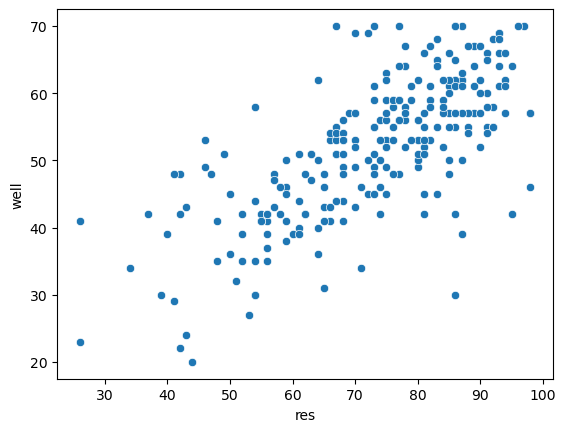

In [11]:
sns.scatterplot(x=X['res'],y=X['well'],palette='tab10')

In [13]:
gmm = GaussianMixture(n_components = 3)
 
# Fit the GMM model for the dataset 
# which expresses the dataset as a 
# mixture of 3 Gaussian Distribution
gmm.fit(X)
 


GaussianMixture(n_components=3)

In [21]:
y_pred= gmm.predict(X)
x = df.loc[:, ['res','well']].values 

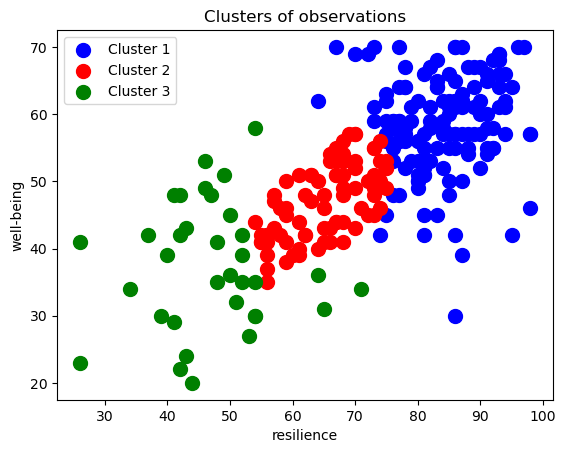

In [22]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'red', label = 'Cluster 2')  
plt.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')  

plt.title('Clusters of observations')  
plt.xlabel('resilience')  
plt.ylabel('well-being')  
plt.legend()  
plt.show()  